In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load IMDB dataset with top 10,000 most frequent words
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [3]:
# Define the BiLSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')
])

# Build model to calculate parameters
model.build(input_shape=(None, maxlen))
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\Yashaswini K M\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 290ms/step - accuracy: 0.6825 - loss: 0.5783 - val_accuracy: 0.8262 - val_loss: 0.3952
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 278ms/step - accuracy: 0.8650 - loss: 0.3346 - val_accuracy: 0.8298 - val_loss: 0.3945
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 279ms/step - accuracy: 0.8266 - loss: 0.4059 - val_accuracy: 0.8290 - val_loss: 0.4012
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 283ms/step - accuracy: 0.8898 - loss: 0.2793 - val_accuracy: 0.8326 - val_loss: 0.4207
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 288ms/step - accuracy: 0.9015 - loss: 0.2534 - val_accuracy: 0.8340 - val_loss: 0.4148


In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8287 - loss: 0.4187

Test Accuracy: 0.8324800133705139


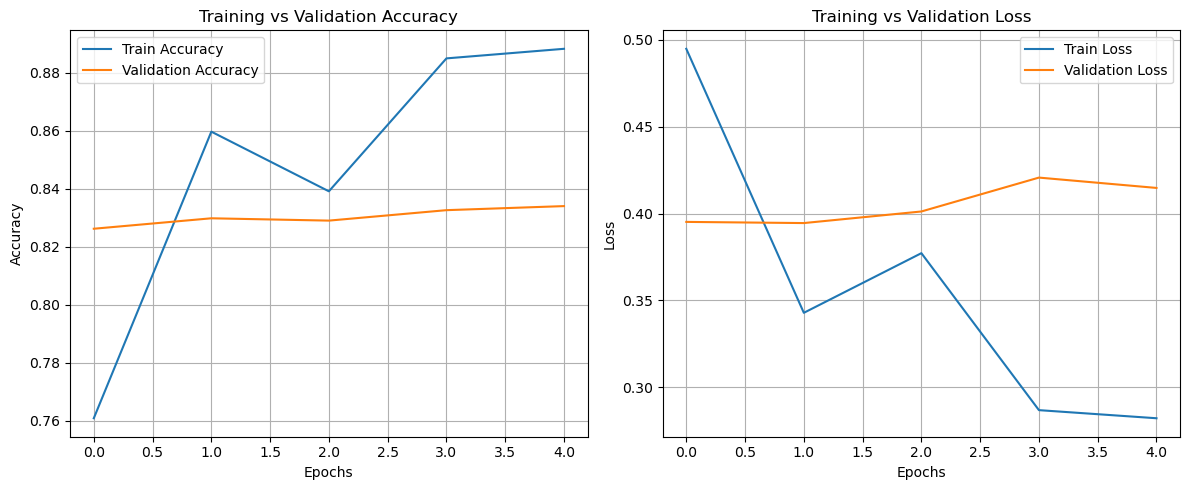

In [6]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step


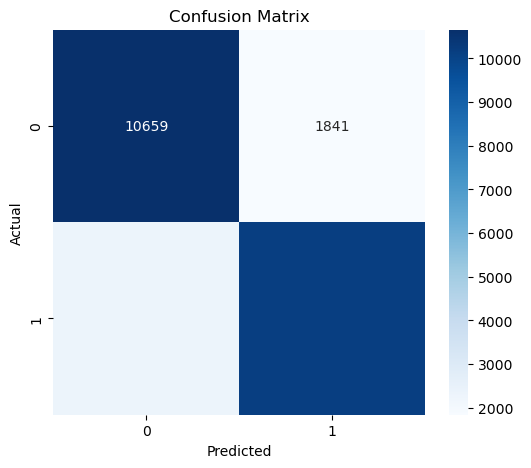


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84     12500
           1       0.85      0.81      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

Model saved as 'bilstm_model.h5'


In [7]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

model.save("bilstm_model.h5")
print("Model saved as 'bilstm_model.h5'")



In [8]:
import pandas as pd
import numpy as np

# Predict on test data
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Create DataFrame
pred_df = pd.DataFrame({
    "Actual": y_test.flatten(),
    "Predicted": y_pred.flatten(),
    "Predicted_Prob": y_pred_probs.flatten()
})

# Save to CSV
pred_df.to_csv("bilstm_predictions.csv", index=False)

print("Predictions saved to 'bilstm_predictions.csv'")


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step
Predictions saved to 'bilstm_predictions.csv'


In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the word index used by IMDB dataset
word_index = imdb.get_word_index()

# Function to convert text into sequence of integers
def preprocess_input_text(text, vocab_size=10000, maxlen=200):
    tokens = text.lower().split()
    sequence = []
    for word in tokens:
        index = word_index.get(word)
        if index is not None and index < vocab_size:
            sequence.append(index + 3)  # Add 3 because IMDB reserves 0,1,2 for special tokens
    return pad_sequences([sequence], maxlen=maxlen)


In [10]:
while True:
    review = input("\nEnter a movie review (or type 'exit' to quit):\n")
    if review.lower() == 'exit':
        break

    processed = preprocess_input_text(review)
    prediction = model.predict(processed)[0][0]
    print("\n🔍 Sentiment Prediction:")
    print("Probability:", round(float(prediction), 4))
    print("Result:", "😊 Positive Review" if prediction > 0.5 else "😞 Negative Review")



Enter a movie review (or type 'exit' to quit):
 A masterpiece. One of the best films I’ve ever watched. The direction and cinematography were stunning


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

🔍 Sentiment Prediction:
Probability: 0.7854
Result: 😊 Positive Review



Enter a movie review (or type 'exit' to quit):
 Terrible pacing and poor direction. I regret spending time on this movie."


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

🔍 Sentiment Prediction:
Probability: 0.0456
Result: 😞 Negative Review



Enter a movie review (or type 'exit' to quit):
 EXIT
